In [1]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import csv

In [2]:
df = pd.read_pickle("Dataset/Tweets.pkl")
#df = pd.read_csv('Dataset\Tweets.csv', encoding='latin-1')

In [3]:
df

,Tweets,Emotion,Writer
0,iâm proud to endorse this diverse and hopefu...,Positive,BarackObama
1,welcome home astrobehnken and astrodoug we lau...,Positive,BarackObama
2,this pandemic is far from overââand our me...,Trust,BarackObama
3,john believed that in all of us there exists t...,Positive,BarackObama
4,john spent his entire life fighting for justic...,Neagtive,BarackObama
...,...,...,...
12104,for a minute there i was all happy thinking it...,Anticipation,Random
12105,for the first time ever my iphone crashed itun...,Neagtive,Random
12106,for trish sa right side ng reply ko may star a...,Positive,Random
12107,forgot about them science exams tbh n,Neutral,Random


In [4]:
df = df.astype(str)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

twits = [
    'This is amazing!',
    'ML is the best, yes it is',
    'I am not sure about how this is going to end...'
]

count = CountVectorizer()
bag = count.fit_transform(twits)

count.vocabulary_

{'this': 13,
 'is': 7,
 'amazing': 2,
 'ml': 9,
 'the': 12,
 'best': 3,
 'yes': 15,
 'it': 8,
 'am': 1,
 'not': 10,
 'sure': 11,
 'about': 0,
 'how': 6,
 'going': 5,
 'to': 14,
 'end': 4}

In [6]:
bag.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]], dtype=int64)

In [7]:
import numpy as np

from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True,
                         norm='l2',
                         smooth_idf=True)

np.set_printoptions(precision=2)

# Feed the tf-idf transformer with our previously created Bag of Words
tfidf.fit_transform(bag).toarray()

array([[0.  , 0.  , 0.72, 0.  , 0.  , 0.  , 0.  , 0.43, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.55, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.4 , 0.  , 0.  , 0.  , 0.47, 0.4 , 0.4 , 0.  ,
        0.  , 0.4 , 0.  , 0.  , 0.4 ],
       [0.33, 0.33, 0.  , 0.  , 0.33, 0.33, 0.33, 0.2 , 0.  , 0.  , 0.33,
        0.33, 0.  , 0.25, 0.33, 0.  ]])

In [8]:
from collections import Counter

vocab = Counter()
for twit in df.Tweets:
    for word in twit.split(' '):
        vocab[word] += 1

vocab.most_common(20)

[('the', 8370),
 ('to', 6878),
 ('and', 4131),
 ('a', 3935),
 ('of', 3465),
 ('in', 3100),
 ('for', 2463),
 ('i', 2390),
 ('is', 2320),
 ('we', 2059),
 ('on', 1849),
 ('this', 1778),
 ('you', 1594),
 ('our', 1531),
 ('are', 1260),
 ('that', 1192),
 ('with', 1099),
 ('have', 1078),
 ('it', 1053),
 ('my', 1006)]

In [9]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [10]:
'''
import math

def plot_distribution(vocabulary):

    hist, edges = np.histogram(list(map(lambda x:math.log(x[1]),vocabulary.most_common())), density=True, bins=500)

    p = figure(tools="pan,wheel_zoom,reset,save",
               toolbar_location="above",
               title="Word distribution accross all twits")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555", )
    show(p)

#plot_distribution(vocab)
'''

'\nimport math\n\ndef plot_distribution(vocabulary):\n\n    hist, edges = np.histogram(list(map(lambda x:math.log(x[1]),vocabulary.most_common())), density=True, bins=500)\n\n    p = figure(tools="pan,wheel_zoom,reset,save",\n               toolbar_location="above",\n               title="Word distribution accross all twits")\n    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555", )\n    show(p)\n\n#plot_distribution(vocab)\n'

In [11]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

vocab_reduced = Counter()
for w, c in vocab.items():
    if not w in stop:
        vocab_reduced[w]=c

vocab_reduced.most_common(20)

[('', 761),
 ('get', 752),
 ('people', 729),
 ('today', 714),
 ('new', 544),
 ('one', 517),
 ('us', 467),
 ('time', 454),
 ('nhs', 430),
 ('country', 429),
 ('make', 414),
 ('need', 406),
 ('done', 403),
 ('vote', 402),
 ('world', 384),
 ('brexit', 378),
 ('day', 373),
 ('obama', 372),
 ('great', 371),
 ('president', 365)]

In [13]:
#plot_distribution(vocab_reduced)

In [14]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [15]:
df['Tweets'] = df['Tweets'].apply(lambda x:preprocessor(x))

In [16]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [17]:
from sklearn.model_selection import train_test_split

# split the dataset in train and test
X= df[['Tweets', 'Emotion']].agg('-'.join, axis=1)
y=df['Writer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [18]:
''''''
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__preprocessor': [None, preprocessor],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [19]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 13.1min finished
C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__preprocessor': [None,
                                                 <function preprocessor at 0x000002928BD73D38>],
                          'vect__stop_words': [['i', 'me', 'my', 'myself',...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
              

In [20]:
print('Best parameter set: ' + str(gs_lr_tfidf.best_params_))
print('Best accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__C': 100.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__preprocessor': <function preprocessor at 0x000002928BD73D38>, 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x000002928C121A68>}
Best accuracy: 0.825


In [21]:
clf = gs_lr_tfidf.best_estimator_
ac=clf.score(X_test, y_test)
print('Accuracy in test:',ac*100)
accuracy=float(ac)

Accuracy in test: 83.29204514175612


In [22]:
import pickle
import os

pickle.dump(clf, open(os.path.join('data', 'LogisticRegression.pkl'), 'wb'), protocol=4)

In [23]:
twits = [
    "On Memorial Day, we honor those who gave all for us. That takes different forms this year, but it’s even more vital with the loss of so many veterans to COVID-19.The way they lived, in service to one another, should be our roadmap in the months ahead.-positive",
    "Little Richard was a great talent and a big part of my childhood so it was an honor when he played at my inauguration in 1993. His music influenced countless musicians and we still feel it today. I will miss him and his unforgettable charisma.-Neutral",
    "What a joy it was to watch him pray and preach. I took heart in him saying-Trust",
    "This is encouraging news, but we still have a lot of work to do-Surprise",
    "The next several weeks may be some of the hardest we have faced as a country-Sadness",
    "As the numbers continue to rise, we can never forget that are real people-Joy",
    "Thank you Kaydyn for staying at home. Glad the food box arrived.-Positive",
    "Two shocking facts of this administration 's failure to lead on COVID.-Charged",
    "Millions of people have lost their employers-tried health care over the last two weeks-Disgust",
    "Yesterday's data showed more people were using transport than previous days.-Anticipation",
    "Five days until Wisconsin's spring election-Anger",
    "Thank you to the NHS and all of our critical workers for all you are doing to fight.-Anger",
    "A movie recommendation as you #stayHome this weekend: 'Slay the Dragon' is inspiring new film -Charged",
    "It is hard to find the words to express my debt to the NHS for saving my life. The efforts of millions of people across this country to stay home are worth it. Together we will overcome this challenge, as we have overcome so many challenges in the past.-Positive",
    "I love Pakistan -Positive"

]

preds = clf.predict(twits)

for i in range(len(twits)):
    print(f'{twits[i]} --> {preds[i]}')

On Memorial Day, we honor those who gave all for us. That takes different forms this year, but it’s even more vital with the loss of so many veterans to COVID-19.The way they lived, in service to one another, should be our roadmap in the months ahead. --> BorisJohnson
Little Richard was a great talent and a big part of my childhood so it was an honor when he played at my inauguration in 1993. His music influenced countless musicians and we still feel it today. I will miss him and his unforgettable charisma. --> Random
What a joy it was to watch him pray and preach. I took heart in him saying --> Random
This is encouraging news, but we still have a lot of work to do --> BillGates
The next several weeks may be some of the hardest we have faced as a country --> HillaryClinton
As the numbers continue to rise, we can never forget that are real people --> BillGates
Thank you Kaydyn for staying at home. Glad the food box arrived. --> BorisJohnson
Two shocking facts of this administration 's f

In [24]:
y_pred=clf.predict(X_test)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

                precision    recall  f1-score   support

   BarackObama       0.84      0.87      0.85       585
     BillGates       0.86      0.85      0.85       608
  BorisJohnson       0.87      0.86      0.87       612
HillaryClinton       0.75      0.75      0.75       599
  JeremyCorbyn       0.77      0.80      0.78       576
        Random       0.92      0.86      0.89       653

      accuracy                           0.83      3633
     macro avg       0.83      0.83      0.83      3633
  weighted avg       0.83      0.83      0.83      3633



In [27]:
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')

C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [28]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
print(ac)

0.8329204514175612


In [29]:
from sklearn.metrics import recall_score

recall=recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')


In [30]:
dict = {
  "Accuracy": accuracy,
  "Precision": precision,
  "Recall": recall
}

In [31]:
import pickle

file = open('Accuracies/LR', 'wb')
pickle.dump(dict, file)
file.close()

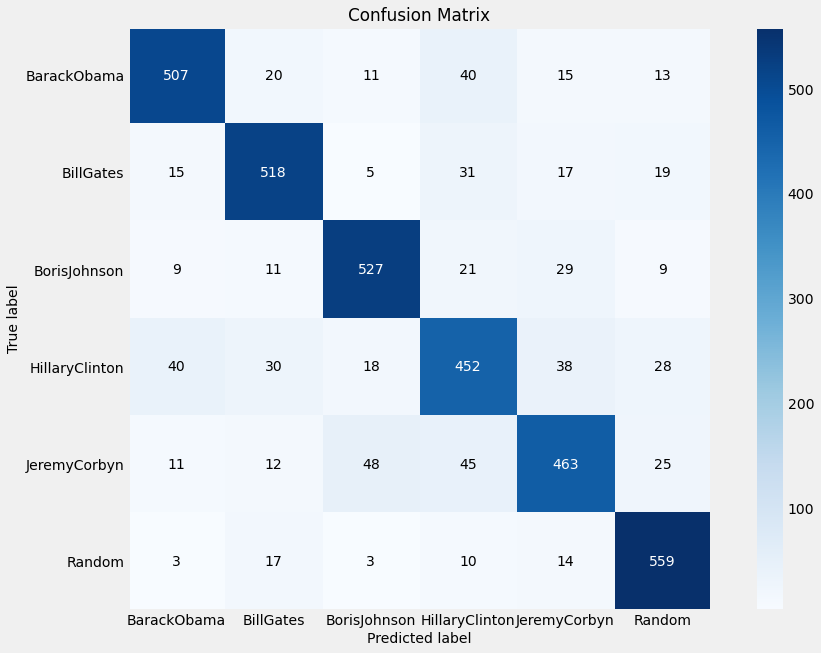

In [32]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(14,10))